## **Prepare the suitable environment (Import the necessary libraries)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

sns.set(style='white', context='notebook', palette='deep')

# **Load dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **data splitting into training and testing** 


In [ ]:
# Load the data
X_train = pd.read_csv("/content/drive/MyDrive/Selected-2/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv")
Y_train = pd.read_csv("/content/drive/MyDrive/Selected-2/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv")
test = pd.read_csv("/content/drive/MyDrive/Selected-2/Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Selected-2/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv")


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(test.shape)
print(y_test.shape)

(59999, 784)
(59999, 1)
(9999, 784)
(9999, 1)


# **Graph that describe the number of appearance of each class in the dataset (countplot)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
0    5999
Name: 0, dtype: int64

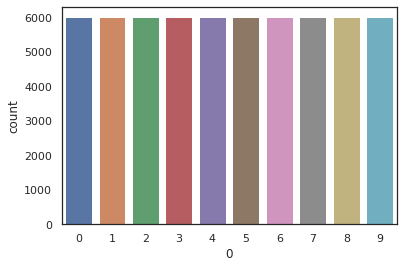

In [ ]:
#plot Count numbers
Y_train=Y_train.iloc[:,0]
y_test=y_test.iloc[:,0]
g = sns.countplot(Y_train)

Y_train.value_counts()


# **Check if there is a null values in the training data**

In [ ]:

X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# **Check if there is a null values in the testing data**

In [ ]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# **Normalize the data**

In [ ]:
# Normalize the data to make CNN faster
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(59999, 784)
(59999,)


# **Reshape data (images)**

In [ ]:
# Reshape image is 3D array (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

print(test.shape)
print(y_test.shape)

(59999, 28, 28, 1)
(59999,)
(9999, 28, 28, 1)
(9999,)


# **Encode labels (one hot encoding)**

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)
y_test  = to_categorical(y_test , num_classes = 10)

In [ ]:
print(Y_train.shape)
print(y_test.shape)

(59999, 10)
(9999, 10)


# **Split data to training and validation**

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=4)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(53999, 28, 28, 1)
(53999, 10)
(6000, 28, 28, 1)
(6000, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


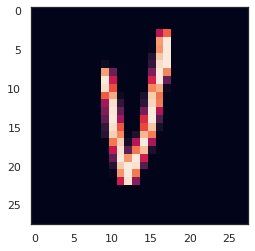

In [ ]:
img_num=55   #  Please try with this number to understand how augment you data 
               # 1111, 111 ,101 ,144 ,663

#image fixing

image = (X_train[img_num][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(Y_train[img_num])

# **CNN model**

In [ ]:
#Creating CNN model

model = Sequential()

model.add(Conv2D(filters = 80, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 80)        2080      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 80)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 80)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        128064    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

# **Out model look**

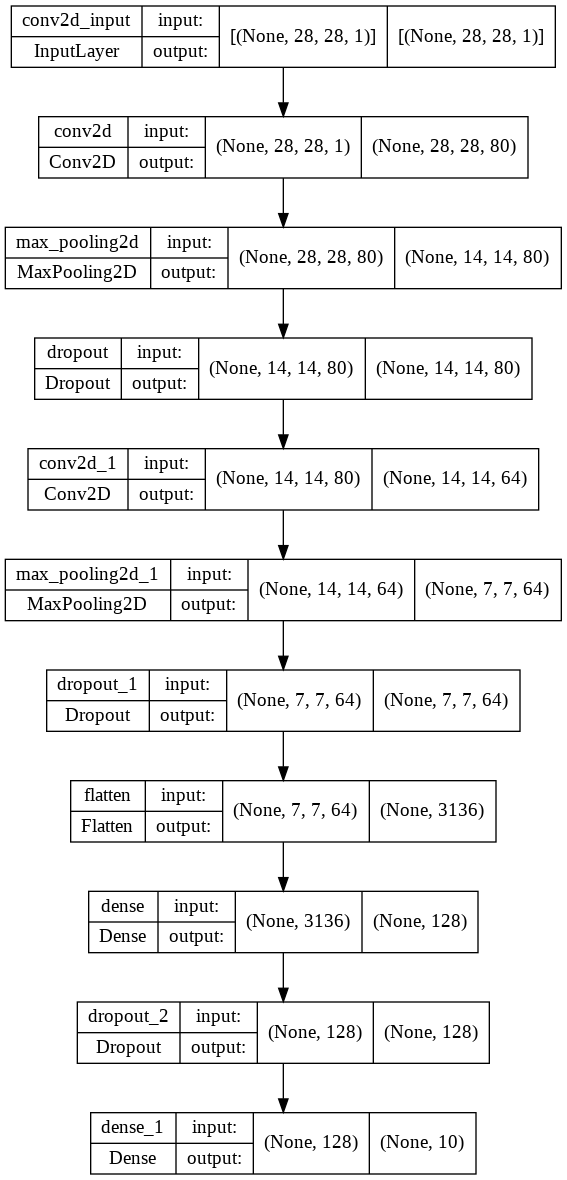

In [ ]:
# print out model look
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

# **Define optimizer**

In [ ]:
# Define the optimizer
optimizer = SGD(lr=0.001, momentum=0.30)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# **Compile the model**

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# **Fit the model**

In [ ]:
history = model.fit( X_train,Y_train, batch_size=64, epochs = 30, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/30
844/844 [==============================] - 21s 14ms/step - loss: 2.1845 - accuracy: 0.2785 - val_loss: 1.8742 - val_accuracy: 0.6900
Epoch 2/30
844/844 [==============================] - 11s 13ms/step - loss: 1.1089 - accuracy: 0.7250 - val_loss: 0.4097 - val_accuracy: 0.9153
Epoch 3/30
844/844 [==============================] - 12s 14ms/step - loss: 0.4452 - accuracy: 0.8764 - val_loss: 0.2244 - val_accuracy: 0.9442
Epoch 4/30
844/844 [==============================] - 13s 15ms/step - loss: 0.3123 - accuracy: 0.9109 - val_loss: 0.1715 - val_accuracy: 0.9548
Epoch 5/30
844/844 [==============================] - 14s 17ms/step - loss: 0.2535 - accuracy: 0.9269 - val_loss: 0.1423 - val_accuracy: 0.9628
Epoch 6/30
844/844 [==============================] - 12s 14ms/step - loss: 0.2191 - accuracy: 0.9379 - val_loss: 0.1260 - val_accuracy: 0.9672
Epoch 7/30
844/844 [==============================] - 11s 14ms/step - loss: 0.1957 - accuracy: 0.9439 - val_loss: 0.1149 - val_accuracy:

# **Graph that describe the loss and accuracy of the training set and the validation set (Training and validation curves)**

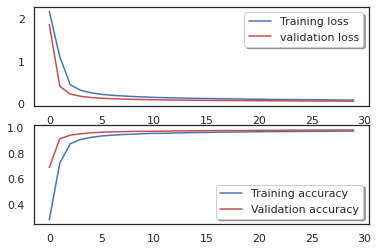

In [ ]:
#Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# **Graph that describe the predicted values of each class in the validation data (confusion matrix)**

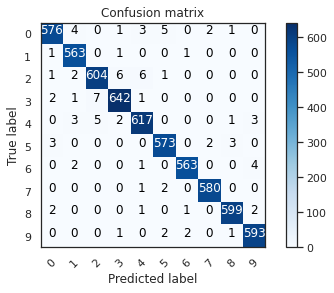

In [ ]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
# predict test results y_pred
y_pred = model.predict(test) 

In [ ]:
print(test.shape)
print(y_test.shape)
print(y_pred.shape)

(9999, 28, 28, 1)
(9999, 10)
(9999, 10)


# **Evaluate the model**

In [ ]:
# Evaluate model
score = model.evaluate(test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))
print('Loss accuracy: %2f%%' % round((score[0] * 100),0))


Test accuarcy: 97.759780%
Loss accuracy: 7.000000%


In [ ]:
results = np.argmax(y_pred,axis = 1)

results = pd.Series(results,name="Label")

# **Draw an example of a test dataset**

1


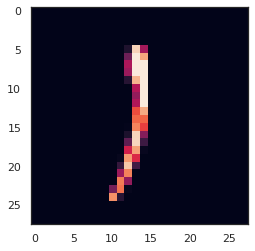

In [ ]:
img_num=90   #  Please try with this number to understand how augment you data 
               # 1111, 111 ,101 ,144 ,663

#image fixing
image = (test[img_num][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(results[img_num])

# **Graph that describe the predicted values of each class in the testing data (confusion matrix)**

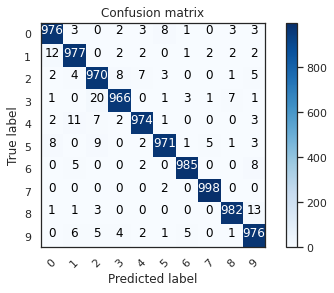

In [ ]:
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, results) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 